In [1]:
import bz2
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from colossus.cosmology import cosmology  
from colossus.halo import mass_so
from colossus.lss import mass_function
import skymapper as skm
import healpy as hp
from matplotlib.ticker import StrMethodFormatter
import astropy.cosmology as cosmopy
import scipy.stats
from bisect import bisect_left

In [2]:
#No correr este otra vez si no es necesario
#9477
#9305
data = pd.read_csv("/scratch/davfer/Cosmohub/9305.csv.bz2", sep=",", comment='#', na_values=r'\N')

In [3]:
unique_halo_id = data['unique_halo_id'].values
v_vir_cosmohub = data['v_vir'].values
z_cosmohub = data['z_cgal'].values
M_cosmohub = data['lmhalo'].values
ra_gal = data['ra_gal'].values
dec_gal = data['dec_gal'].values
coords_x = data['xhalo'].values
coords_y = data['yhalo'].values
coords_z = data['zhalo'].values

In [4]:
print(len(unique_halo_id),len(v_vir_cosmohub),len(z_cosmohub),len(M_cosmohub))

1951814 1951814 1951814 1951814


In [5]:
#No correr este otra vez si no es necesario
print(len(set(unique_halo_id)))

1920758


In [6]:
#No correr este otra vez si no es necesario
inds = []
unique_halo_id_sin_repetir = []
seen = set()
for i, halo in enumerate(unique_halo_id):
    if halo not in seen:
        inds.append(i)
        unique_halo_id_sin_repetir.append(halo)
    seen.add(halo)

In [7]:
#No correr este otra vez si no es necesario
unique_halo_id = unique_halo_id_sin_repetir
v_vir_cosmohub = v_vir_cosmohub[inds]
z_cosmohub = z_cosmohub[inds]
M_cosmohub = M_cosmohub[inds]
ra_gal = ra_gal[inds]
dec_gal = dec_gal[inds]
coords_x = coords_x[inds]
coords_y = coords_y[inds]
coords_z = coords_z[inds]

In [8]:
print(len(v_vir_cosmohub),len(z_cosmohub),len(M_cosmohub))

1920758 1920758 1920758


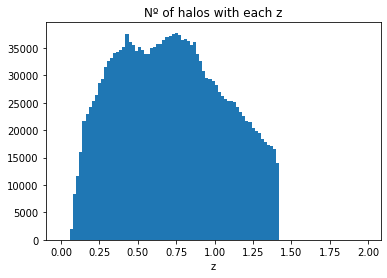

In [9]:
bins = np.arange(0,2,0.02)

plt.figure()
plt.hist(z_cosmohub,bins,align='mid')
plt.title('Nº of halos with each z')
plt.xlabel('z')
plt.show()

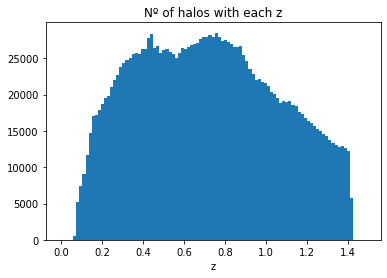

In [10]:
bins = np.arange(0,1.5,0.015)

plt.figure()
plt.hist(z_cosmohub,bins,align='mid')
plt.title('Nº of halos with each z')
plt.xlabel('z')
plt.show()

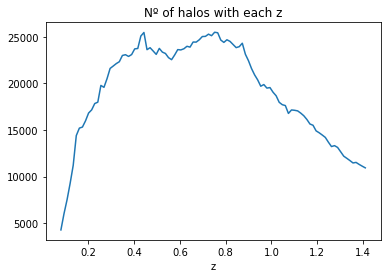

In [11]:
zhist,edges_z= np.histogram(z_cosmohub,bins=100)
z_array = (edges_z[:-1] + edges_z[1:])/2
plt.figure()
plt.plot(z_array,zhist)
plt.xlabel('z')
plt.title('Nº of halos with each z')
plt.savefig('../Plots/Hist_z_disp_pocos_datos.png')
plt.show()

In [12]:
#No correr este otra vez si no es necesario
v_vir_0_1_cosmohub = []
v_vir_1_2_cosmohub = []
M_0_1_cosmohub = []
M_1_2_cosmohub = []


index_0_1 = np.where((z_cosmohub>=0)&(z_cosmohub<=1))[0]
index_1_2 = np.where((z_cosmohub>1)&(z_cosmohub<=2))[0] 
v_vir_0_1_cosmohub = v_vir_cosmohub[index_0_1]
M_0_1_cosmohub = M_cosmohub[index_0_1]
z_0_1_cosmohub = z_cosmohub[index_0_1]
v_vir_1_2_cosmohub = v_vir_cosmohub[index_1_2] 
M_1_2_cosmohub = M_cosmohub[index_1_2]
z_1_2_cosmohub = z_cosmohub[index_1_2]


v_vir_0_1_cosmohub = np.array(v_vir_0_1_cosmohub)
v_vir_1_2_cosmohub = np.array(v_vir_1_2_cosmohub)
M_0_1_cosmohub = np.array(M_0_1_cosmohub)
M_1_2_cosmohub = np.array(M_1_2_cosmohub)
z_0_1_cosmohub = np.array(z_0_1_cosmohub)
z_1_2_cosmohub = np.array(z_1_2_cosmohub)

z_0_1_media = np.mean(z_0_1_cosmohub)
z_1_2_media = np.mean(z_1_2_cosmohub)

M_0_1_cosmohub = 10**M_0_1_cosmohub
M_1_2_cosmohub = 10**M_1_2_cosmohub
M_cosmohub = 10**M_cosmohub
M_cosmohub = np.array(M_cosmohub)

In [13]:
def vc(M,Omega_m,Omega_lambda,h,z):
    Delta_c = mass_so.deltaVir(z)
    v_c=96.6*((Delta_c*Omega_m*(h**2)/24.4)**(1/6))*(((1+z)/3.3)**(1/2))*((M/10**11)**(1/3))
    return v_c

In [14]:
#No correr este otra vez si no es necesario
params = cosmology.cosmologies['planck15']
params['Om0'] = 0.25
params['Ob0'] = 0.044
params['Ode0'] = 0.75
params['H0'] = 70
params['sigma8'] = 0.8
params['ns'] = 0.95
cosmo = cosmology.setCosmology('planck15',params)

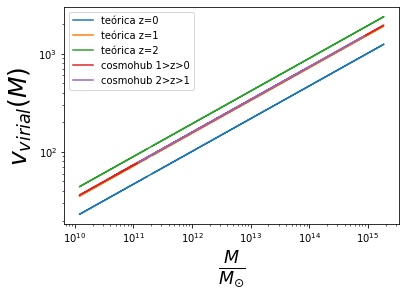

In [15]:
# Parámetros de MICECAT (Best fit (WHISP))
Omega_m = 0.25
Omega_b = 0.044
Omega_lambda = 0.75
h = 0.7
alpha = 0.17
beta = -0.55
v_c0 = 37.1535  #km/s
v_c1 = 24547.08916 #km/s
M=np.logspace(10,15,100)  #En unidades solares

z = 0
v_c_0=vc(M_cosmohub,Omega_m,Omega_lambda,h,z)

z=1
v_c_1=vc(M_cosmohub,Omega_m,Omega_lambda,h,z)

z=2
v_c_2=vc(M_cosmohub,Omega_m,Omega_lambda,h,z)



plt.figure()
plt.loglog(M_cosmohub,v_c_0,label='teórica z=0')
plt.loglog(M_cosmohub,v_c_1,label='teórica z=1')
plt.loglog(M_cosmohub,v_c_2,label='teórica z=2')
plt.loglog(M_0_1_cosmohub,v_vir_0_1_cosmohub,label='cosmohub 1>z>0')
plt.loglog(M_1_2_cosmohub,v_vir_1_2_cosmohub,label='cosmohub 2>z>1')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel(r'$v_{virial}(M)$',fontsize=25)
plt.legend(loc='upper left')
plt.savefig('../Plots/v_virial_disp_pocos_datos.png')
plt.show()

In [16]:
print('z medio del bin 0-1:',z_0_1_media)
print('z medio del bin 1-2:',z_1_2_media)
print('z medio de todos',np.mean(z_cosmohub))

z medio del bin 0-1: 0.5723416052551943
z medio del bin 1-2: 1.1883913496338943
z medio de todos 0.7188634913924604


In [17]:
def sigma_generica(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,Delta_c,v_c):
    f=(Omega_b/Omega_m)*(0.75)
    resul_teorico = alpha*f*M*((M*h/1e11)**beta)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3)
    sigma_generica = 0.1*resul_teorico
    return sigma_generica

In [18]:
def sigma_propagada(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,Delta_c,v_c):
    f=(Omega_b/Omega_m)*(0.75)
    resul_teorico = alpha*f*M*((M*h/1e11)**beta)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3)
    sigma_propagada = np.sqrt((f*M*((M*h/1e11)**beta)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3)*0.02)**2 + (alpha*f*M*((M*h/1e11)**beta)*np.log(M*h/1e11)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3)*0.12)**2 + (resul_teorico*(-3*v_c0**2/v_c**3)*v_c0*0.03/np.log10(np.exp(1)))**2 +(resul_teorico*(3*v_c**3/v_c1**(-4))*v_c1*0.75/np.log10(np.exp(1)))**2)
    return sigma_propagada

In [19]:
def M_HI(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,Delta_c,v_c,sigma):
    #v_c=96.6*((Delta_c*Omega_m*(h**2)/24.4)**(1/6))*(((1+z)/3.3)**(1/2))*((M/10**11)**(1/3))
    f=(Omega_b/Omega_m)*(0.75) # (1-Y)*Omega_b/Omega_m
    resul_teorico = alpha*f*M*((M*h/1e11)**beta)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3) 
    resul_real = scipy.stats.norm.rvs(resul_teorico, sigma, (1,len(resul_teorico)))[0]
    return resul_real

In [20]:
def M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,Delta_c,v_c):
    #v_c=96.6*((Delta_c*Omega_m*(h**2)/24.4)**(1/6))*(((1+z)/3.3)**(1/2))*((M/10**11)**(1/3))
    f=(Omega_b/Omega_m)*(0.75) # (1-Y)*Omega_b/Omega_m
    resul_teorico = alpha*f*M*((M*h/1e11)**beta)*np.exp(-(v_c0/v_c)**3)*np.exp(-(v_c/v_c1)**3)
    return resul_teorico

In [21]:
bins_M_cosmohub = np.logspace(np.log10(min(M_cosmohub)),np.log10(max(M_cosmohub)),100)
edges_izq_bins_M_cosmohub = bins_M_cosmohub[:-1]
edges_der_bins_M_cosmohub = bins_M_cosmohub[1:]
M_array = (edges_izq_bins_M_cosmohub + edges_der_bins_M_cosmohub)/2
z_cosmohub_mean_bin = []
indexes = [[] for i in range(len(edges_izq_bins_M_cosmohub))]
for i in range(len(edges_izq_bins_M_cosmohub)):
    index = np.where((edges_izq_bins_M_cosmohub[i] <= M_cosmohub)&(M_cosmohub < edges_der_bins_M_cosmohub[i]))[0]
    indexes[i] = index
    z_cosmohub_mean_bin.append(np.mean(z_cosmohub[index]))    

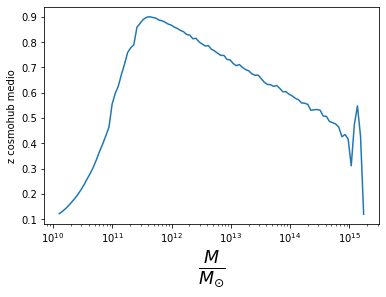

In [22]:
plt.figure()
plt.plot(M_array,z_cosmohub_mean_bin)
plt.xscale('log')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel('z cosmohub medio')
plt.savefig('../Plots/Z_medio_disp_pocos_datos.png')
plt.show()

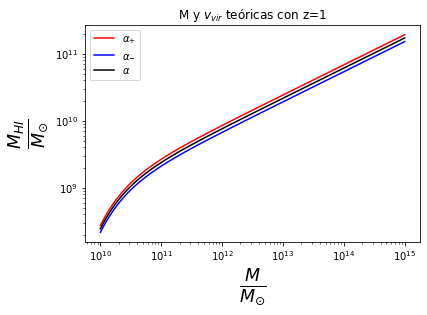

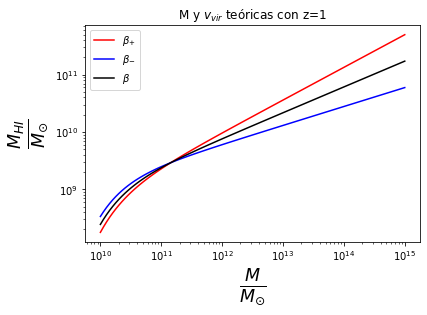

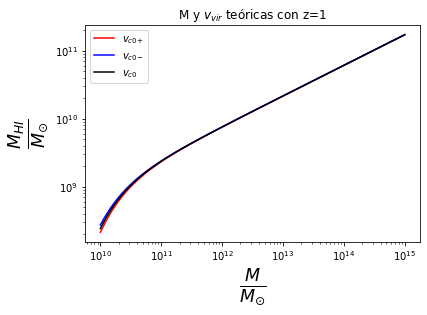

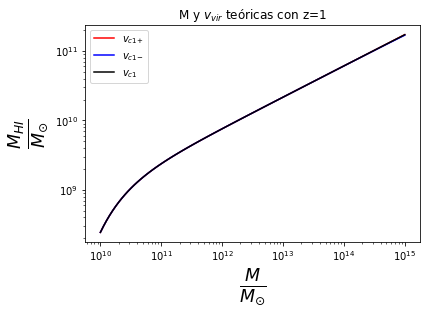

In [23]:
alpha1 = 0.17 + 0.02
alpha2 = 0.17 - 0.02
beta1 = -0.55 + 0.12 
beta2 = -0.55 - 0.12  
v_c0_1 = 37.1535 + 37.1535*0.03  
v_c0_2 = 37.1535 - 37.1535*0.03 
v_c1_1 = 24547.08916 + 24547.08916*0.75
v_c1_2 = 24547.08916 - 24547.08916*0.75


plt.figure()
plt.loglog(M,M_HI_no_disp(M,alpha1,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'r-',label=r'$\alpha_{+}$')
plt.loglog(M,M_HI_no_disp(M,alpha2,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'$\alpha_{-}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'k-',label=r'$\alpha$')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel(r'$\frac{M_{HI}}{M_{\odot}}$',fontsize=25)
plt.legend()
plt.title(r'M y $v_{vir}$ teóricas con z=1')
plt.savefig('../Plots/M_HI_M_alphas_disp_pocos_datos.png',bbox_inches='tight')
plt.show()


plt.figure()
plt.loglog(M,M_HI_no_disp(M,alpha,beta1,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'r-',label=r'$\beta_{+}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta2,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'$\beta_{-}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'k-',label=r'$\beta$')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel(r'$\frac{M_{HI}}{M_{\odot}}$',fontsize=25)
plt.legend()
plt.title(r'M y $v_{vir}$ teóricas con z=1')
plt.savefig('../Plots/M_HI_M_betas_disp_pocos_datos.png',bbox_inches='tight')
plt.show()

plt.figure()
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0_1,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'r-',label=r'${v_{c0}}_{+}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0_2,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'${v_{c0}}_{-}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'k-',label=r'$v_{c0}$')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel(r'$\frac{M_{HI}}{M_{\odot}}$',fontsize=25)
plt.legend()
plt.title(r'M y $v_{vir}$ teóricas con z=1')
plt.savefig('../Plots/M_HI_M_vc0s_disp_pocos_datos.png',bbox_inches='tight')
plt.show()

plt.figure()
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1_1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'r-',label=r'${v_{c1}}_{+}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1_2,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'${v_{c1}}_{-}$')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'k-',label=r'$v_{c1}$')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel(r'$\frac{M_{HI}}{M_{\odot}}$',fontsize=25)
plt.legend()
plt.title(r'M y $v_{vir}$ teóricas con z=1')
plt.savefig('../Plots/M_HI_M_vc1s_disp_pocos_datos.png',bbox_inches='tight')
plt.show()

Línea teórica + y la -. Calcular la diferencia entre ambas respecto al valor original (la sigma) para cada bin de masa y aplicársela a los datos de Cosmohub.

In [24]:
def sigma_1(M_cosmohub):
    M = np.logspace(10,15,1000)
    sigma_alpha = 0.5*abs(M_HI_no_disp(M,alpha1,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)) - M_HI_no_disp(M,alpha2,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)))
    sigma_beta = 0.5*abs(M_HI_no_disp(M,alpha,beta1,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)) - M_HI_no_disp(M,alpha,beta2,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)))
    sigma_v_c0 = 0.5*abs(M_HI_no_disp(M,alpha,beta,v_c0_1,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)) - M_HI_no_disp(M,alpha,beta,v_c0_2,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1))) 
    sigma_v_c1 = 0.5*abs(M_HI_no_disp(M,alpha,beta,v_c0,v_c1_1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)) - M_HI_no_disp(M,alpha,beta,v_c0,v_c1_2,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)))
    sigma = np.sqrt(sigma_alpha**2+sigma_beta**2+sigma_v_c0**2+sigma_v_c1**2)
    indices = np.digitize(M_cosmohub, M, right=False) 
    indices = indices - 1
    sigma_1 = sigma[indices]
    return sigma_1


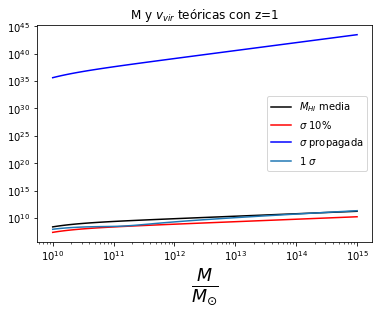

In [25]:
plt.figure()
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'k-',label=r'$M_{HI}$ media')
plt.loglog(M,sigma_generica(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'r-',label=r'$\sigma$ 10%')
plt.loglog(M,sigma_propagada(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'$\sigma$ propagada')
plt.loglog(M,sigma_1(M),label=r'1 $\sigma$')
plt.legend()
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.title(r'M y $v_{vir}$ teóricas con z=1')
plt.savefig('../Plots/M_HI_M_sigmas_disp_pocos_datos.png',dpi=900)
plt.show()

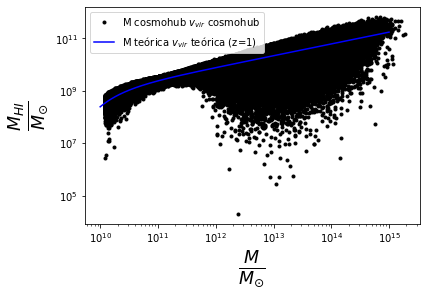

In [26]:
#No correr este otra vez si no es necesario
mpl.rcParams['agg.path.chunksize'] = 10000
M = np.logspace(10,15,1000)


alpha_real_1 = scipy.stats.norm.rvs(alpha, 0.02,len(M_cosmohub))
beta_real_1 = scipy.stats.norm.rvs(beta, 0.12,len(M_cosmohub))
v_c0_real_1 = scipy.stats.norm.rvs(v_c0, 37.1535*0.03,len(M_cosmohub))
v_c1_real_1 = scipy.stats.norm.rvs(v_c1, 24547.08916*0.75,len(M_cosmohub))


alpha_real_2 = scipy.stats.norm.rvs(alpha, 0.02,len(M))
beta_real_2 = scipy.stats.norm.rvs(beta, 0.12,len(M))
v_c0_real_2 = scipy.stats.norm.rvs(v_c0, 37.1535*0.03,len(M))
v_c1_real_2 = scipy.stats.norm.rvs(v_c1, 24547.08916*0.75,len(M))


alpha_real_3 = scipy.stats.norm.rvs(alpha, 0.02,len(M_array))
beta_real_3 = scipy.stats.norm.rvs(beta, 0.12,len(M_array))
v_c0_real_3 = scipy.stats.norm.rvs(v_c0, 37.1535*0.03,len(M_array))
v_c1_real_3 = scipy.stats.norm.rvs(v_c1, 24547.08916*0.75,len(M_array))

plt.figure()
plt.loglog(M_cosmohub,M_HI(M_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_cosmohub,mass_so.deltaVir(z_cosmohub),v_vir_cosmohub,sigma_1(M_cosmohub)),'k.',label=r'M cosmohub $v_{vir}$ cosmohub')
#plt.loglog(M_cosmohub,M_HI(M_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_cosmohub,mass_so.deltaVir(z_cosmohub),vc(M_cosmohub,Omega_m,Omega_lambda,h,z_cosmohub)),'r.',label=r'M cosmohub $v_{vir}$ teórica (z cosmohub)')
plt.loglog(M,M_HI_no_disp(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'M teórica $v_{vir}$ teórica (z=1)')
#plt.loglog(M,M_HI(M,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(np.mean(z_cosmohub)),vc(M,Omega_m,Omega_lambda,h,np.mean(z_cosmohub))),'g-',label=r'M teórica $v_{vir}$ teórica (z cosmohub medio)')
#plt.loglog(M_array,M_HI(M_array,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,1,mass_so.deltaVir(np.mean(z_cosmohub_mean_bin)),vc(M_array,Omega_m,Omega_lambda,h,np.mean(z_cosmohub_mean_bin))),c='gold',label=r'M teórica $v_{vir}$ teórica (z cosmohub medio por bines)')
plt.legend(loc='upper left')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel(r'$\frac{M_{HI}}{M_{\odot}}$',fontsize=25)
plt.savefig('../Plots/M_HI_M_disp_pocos_datos.png',dpi=900)
plt.show()


#plt.figure()
#plt.loglog(M_cosmohub,M_HI_no_disp(M_cosmohub,alpha_real_1,beta_real_1,v_c0_real_1,v_c1_real_1,Omega_m,Omega_b,h,z_cosmohub,mass_so.deltaVir(z_cosmohub),v_vir_cosmohub),'k.',label=r'M cosmohub $v_{vir}$ cosmohub')
#plt.loglog(M_cosmohub,M_HI_no_disp(M_cosmohub,alpha_real_1,beta_real_1,v_c0_real_1,v_c1_real_1,Omega_m,Omega_b,h,z_cosmohub,mass_so.deltaVir(z_cosmohub),vc(M_cosmohub,Omega_m,Omega_lambda,h,z_cosmohub)),'r.',label=r'M cosmohub $v_{vir}$ teórica (z cosmohub)')
#plt.loglog(M,M_HI_no_disp(M,alpha_real_2,beta_real_2,v_c0_real_2,v_c1_real_2,Omega_m,Omega_b,h,1,mass_so.deltaVir(1),vc(M,Omega_m,Omega_lambda,h,1)),'b-',label=r'M teórica $v_{vir}$ teórica (z=1)')
#plt.loglog(M,M_HI_no_disp(M,alpha_real_2,beta_real_2,v_c0_real_2,v_c1_real_2,Omega_m,Omega_b,h,1,mass_so.deltaVir(np.mean(z_cosmohub)),vc(M,Omega_m,Omega_lambda,h,np.mean(z_cosmohub))),'g-',label=r'M teórica $v_{vir}$ teórica (z cosmohub medio)')
#plt.loglog(M_array,M_HI_no_disp(M_array,alpha_real_3,beta_real_3,v_c0_real_3,v_c1_real_3,Omega_m,Omega_b,h,1,mass_so.deltaVir(np.mean(z_cosmohub_mean_bin)),vc(M_array,Omega_m,Omega_lambda,h,np.mean(z_cosmohub_mean_bin))),c='gold',label=r'M teórica $v_{vir}$ teórica (z cosmohub medio por bines)')
#plt.legend(loc='upper left')
#plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
#plt.ylabel(r'$\frac{M_{HI}}{M_{\odot}}$',fontsize=25)
#plt.savefig('../Plots/M_HI_M_disp_pocos_datos.png')
#plt.show()

In [27]:
M_0_8_0_9_cosmohub = []
z_0_8_0_9_cosmohub = []
ra_gal_0_8_0_9 = []
dec_gal_0_8_0_9 = []
v_vir_cosmohub_0_8_0_9 = []

indexz = np.where((z_cosmohub>0.8)&(z_cosmohub<0.9))[0]
M_0_8_0_9_cosmohub = M_cosmohub[indexz]
z_0_8_0_9_cosmohub = z_cosmohub[indexz]
ra_gal_0_8_0_9 = ra_gal[indexz]
dec_gal_0_8_0_9 = dec_gal[indexz]
v_vir_cosmohub_0_8_0_9 = v_vir_cosmohub[indexz]

M_0_8_0_9_cosmohub = np.array(M_0_8_0_9_cosmohub)
z_0_8_0_9_cosmohub = np.array(z_0_8_0_9_cosmohub)
ra_gal_0_8_0_9 = np.array(ra_gal_0_8_0_9)
dec_gal_0_8_0_9 = np.array(dec_gal_0_8_0_9)
v_vir_cosmohub_0_8_0_9 = np.array(v_vir_cosmohub_0_8_0_9)

M_intervalos = np.logspace(np.log10(min(M_0_8_0_9_cosmohub)),np.log10(max(M_0_8_0_9_cosmohub)),500)
numbers = []

for i in range(len(M_intervalos)-1):
    indexes = np.where(np.logical_and(M_0_8_0_9_cosmohub>=M_intervalos[i], (M_0_8_0_9_cosmohub<=M_intervalos[i+1])))[0]
    number = len(indexes)
    numbers.append(number)

M_intervalos = np.delete(M_intervalos,-1)
numbers = np.array(numbers)

In [28]:
def n(Masa, z):
    n = mass_function.massFunction(Masa, z, mdef = 'fof', model = 'crocce10', q_out = 'dndlnM')
    return n

In [29]:
z = 0.85
Masa = np.logspace(11,15)
potencia = np.log10(Masa[1]/Masa[0])
dMasa = Masa*(10**potencia-1)
dMasa = np.array(dMasa)
A = sum(n(Masa, z)*dMasa)
A

19274885629.307484

In [30]:
def n(Masa, z):
    n = (1/A)*mass_function.massFunction(Masa, z, mdef = 'fof', model = 'crocce10', q_out = 'dndlnM')
    return n

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


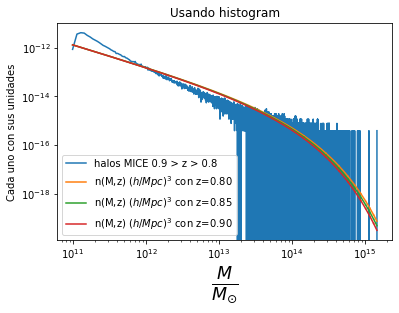

In [31]:
mhist,edges_mass = np.histogram(M_0_8_0_9_cosmohub,bins=100000)
Mass_array = (edges_mass[:-1] + edges_mass[1:])/2
dMasa = edges_mass[1:] - edges_mass[:-1]
B = sum(mhist*dMasa)
mhist = mhist/B

plt.figure()
plt.plot(Mass_array,mhist,label='halos MICE 0.9 > z > 0.8')
plt.plot(Mass_array,n(Mass_array,0.8),label=r'n(M,z) ${(h/Mpc)}^3$ con z=0.80')
plt.plot(Mass_array,n(Mass_array,0.85),label=r'n(M,z) ${(h/Mpc)}^3$ con z=0.85')
plt.plot(Mass_array,n(Mass_array,0.9),label=r'n(M,z) ${(h/Mpc)}^3$ con z=0.90')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel('Cada uno con sus unidades')
plt.xscale('log')
plt.yscale('log')
plt.title('Usando histogram')
plt.legend()
plt.savefig('../Plots/Hist_halos_0_8_0_9_cada_uno_sus_unidades_disp_pocos_datos.png')
plt.show()


In [32]:
#No correr este otra vez si no es necesario
#En Mpc/h


lado_x = max(coords_x)-min(coords_x)
lado_y = max(coords_y)-min(coords_y)
lado_z = max(coords_z)-min(coords_z)

In [33]:
print('Lado x Lado y Lado z')
print(lado_x,lado_y,lado_z,' (Mpc/h)')

Lado x Lado y Lado z
3058.5 3057.0 3055.5  (Mpc/h)


In [34]:
#En (Mpc/h)**3
fSky = 1/8
Vol = (4/3)*np.pi*(cosmo.comovingDistance(0,0.9,True)**3 - cosmo.comovingDistance(0,0.8,True)**3)*fSky
Vol

1362474108.6081061

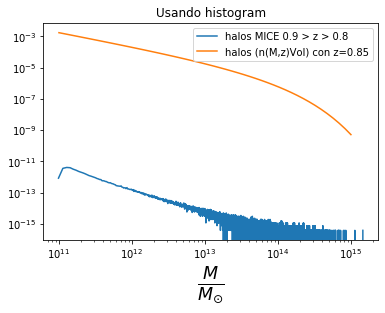

In [35]:
#Adimensional
N_halos = n(Masa,z)*Vol


z = 0.85

plt.figure()
plt.plot(Mass_array,mhist,label='halos MICE 0.9 > z > 0.8')
plt.plot(Masa,N_halos,label=r'halos (n(M,z)Vol) con z=0.85')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.title('Usando histogram')
plt.legend()
plt.savefig('../Plots/Hist_halos_0_8_0_9_adim_nVol_disp_pocos_datos.png')
plt.show()

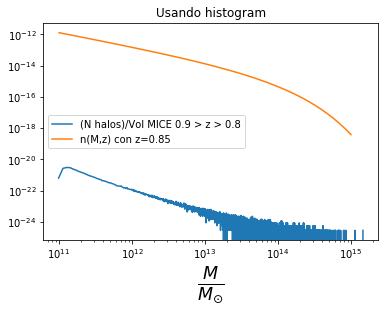

In [36]:
#Adimensional



z = 0.85

plt.figure()
plt.plot(Mass_array,mhist/Vol,label='(N halos)/Vol MICE 0.9 > z > 0.8')
plt.plot(Masa,n(Masa,z),label=r'n(M,z) con z=0.85')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.title('Usando histogram')
plt.legend()
plt.savefig('../Plots/Hist_halos_0_8_0_9_adim_NentreV_disp_pocos_datos.png')
plt.show()


In [37]:
densidad_critica = cosmo.rho_c(0.85)*1e9/h
print('Densidad crítica ',densidad_critica,'(7.85 10^11) Msol h^3 /Mpc^3')

Densidad crítica  925315423852.1643 (7.85 10^11) Msol h^3 /Mpc^3


In [38]:
#No correr este otra vez si no es necesario
print(max(coords_x),min(coords_x),'Mpc/h')
print(max(coords_y),min(coords_y),'Mpc/h')
print(max(coords_z),min(coords_z),'Mpc/h')

3058.5 0.0 Mpc/h
3057.0 0.0 Mpc/h
3055.5 0.0 Mpc/h


Creamos un cubo de lado 3062 Mpc/h (por redondear) y lo dividimos en 128x128x128 celdas.

In [39]:
n = 128

In [40]:
Cubo_x = np.linspace(0,3062,n+1)  #101 fronteras para que haya 100 celdas
Cubo_y = np.linspace(0,3062,n+1)  #101 fronteras para que haya 100 celdas
Cubo_z = np.linspace(0,3062,n+1)  #101 fronteras para que haya 100 celdas

Vcelda = (Cubo_x[1] - Cubo_x[0])**3
print(Vcelda,'(Mpc/h)^3')

13689.438976287842 (Mpc/h)^3


In [41]:
#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

Densidad_3D_oscura = np.zeros((n,n,n))
posiciones_x = []
posiciones_y = []
posiciones_z = []

pos_ocupadas_x = []
pos_ocupadas_y = []
pos_ocupadas_z = []


for x,y,z,m in zip(coords_x,coords_y,coords_z,M_cosmohub):
    pos_x = bisect_left(Cubo_x, x)  #np.digitize
    pos_x = pos_x - 1
    if pos_x == -1:
        pos_x = 0
    pos_y = bisect_left(Cubo_y, y)
    pos_y = pos_y - 1
    if pos_y == -1:
        pos_y = 0
    pos_z = bisect_left(Cubo_z, z)
    pos_z = pos_z - 1
    if pos_z == -1:
        pos_z = 0
    posiciones_x.append(pos_x)
    posiciones_y.append(pos_y)
    posiciones_z.append(pos_z)
    Densidad_3D_oscura[pos_x,pos_y,pos_z] = Densidad_3D_oscura[pos_x,pos_y,pos_z] + (m/(Vcelda/n**3))

#r = np.sqrt(coords_x**2 + coords_y**2 + coords_z**2) 
#np.where(r < cosmo.angularDiameterDistance(max(z_cosmohub),derivative=0))[0]


#pos_ocupadas_x = pos_ocupadas_x
#pos_ocupadas_y = pos_ocupadas_y
#pos_ocupadas_z = pos_ocupadas_z



Densidad_3D_oscura_media = np.mean(Densidad_3D_oscura[posiciones_x,posiciones_y,posiciones_z])
Sobredensidad_3D_oscura = Densidad_3D_oscura/Densidad_3D_oscura_media - 1
#Primer indice controla la matriz en la que está, el segundo la fila
#y el tercero la columna de esa matriz.

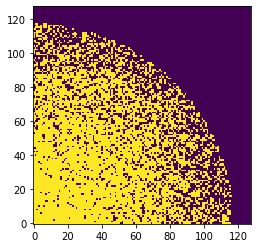

In [42]:
mapa = np.zeros((n,n,n))
mapa[posiciones_x,posiciones_y,posiciones_z] = 1
plt.imshow(mapa[:,:,50])
plt.gca().invert_yaxis()
plt.show()

In [43]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

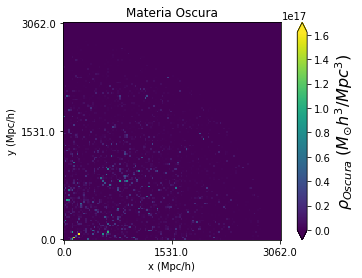

In [44]:
plt.figure()
fig_imshow = plt.imshow(Densidad_3D_oscura[:,:,50])
plt.gca().invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'y (Mpc/h)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_x[0],Cubo_x[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_y[0],Cubo_y[n],3))
plt.title('Materia Oscura')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{Oscura} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.savefig('../Plots/Dens_oscura_3D_disp_pocos_datos.png')
plt.show()

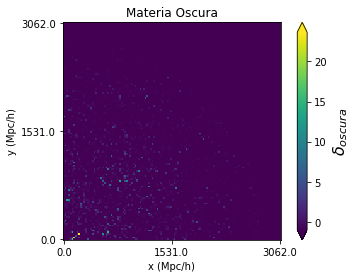

In [45]:
plt.figure()
fig_imshow = plt.imshow(Sobredensidad_3D_oscura[:,:,50])
plt.gca().invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'y (Mpc/h)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_x[0],Cubo_x[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_y[0],Cubo_y[n],3))
plt.title('Materia Oscura')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{oscura}}$',fontsize=16)
plt.savefig('../Plots/Sobredens_oscura_3D_disp_pocos_datos.png')
plt.show()

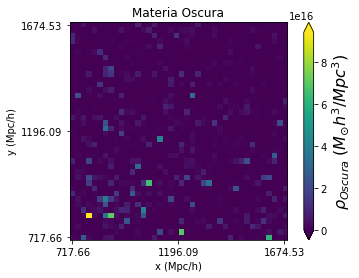

In [46]:
plt.figure()
ax = plt.gca()
fig_imshow = plt.imshow(Densidad_3D_oscura[30:70,30:70,50])
plt.gca().invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'y (Mpc/h)')
plt.xticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_x[30],Cubo_x[70],3),2))
plt.yticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_y[30],Cubo_y[70],3),2))
plt.title('Materia Oscura')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{Oscura} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.show()

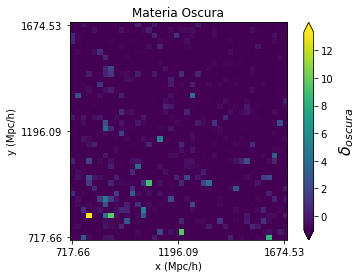

In [47]:
plt.figure()
fig_imshow = plt.imshow(Sobredensidad_3D_oscura[30:70,30:70,50])
plt.gca().invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'y (Mpc/h)')
plt.xticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_x[30],Cubo_x[70],3),2))
plt.yticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_y[30],Cubo_y[70],3),2))
plt.title('Materia Oscura')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{oscura}$',fontsize=16)
plt.show()

In [48]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.scatter(posiciones_x,posiciones_y,posiciones_z,s=0.001,c=M_cosmohub/Vcelda)
#ax.set_xlabel('Lado x')
#ax.set_ylabel('Lado y')
#ax.set_zlabel('Lado z')
#ax.set_title('Materia Oscura')
#plt.show()

In [49]:
print(max(dec_gal_0_8_0_9),min(dec_gal_0_8_0_9),'grados')
print(max(ra_gal_0_8_0_9),min(ra_gal_0_8_0_9),'grados')

89.86513599999999 0.0026079999999999996 grados
89.997265 0.0 grados


Curioso que la ra solo vaya entre 0 y 90 para las galaxias de estos redshift. Cogiendo todo el catálogo, iban entre -270 y 90.

In [50]:
lado_ra = np.linspace(0,90,n+1)  #129 fronteras para que haya 128 celdas
lado_dec = (180/np.pi)*np.arccos(np.linspace(np.cos(0),np.cos(np.pi/2),129))
lado_dec_lin = np.linspace(0,90,n+1)
lado_dec_izq = lado_dec[:-1]
lado_dec_der = lado_dec[1:]
lado_dec_lin_izq = lado_dec_lin[:-1]
lado_dec_lin_der = lado_dec_lin[1:]


delta_ra = lado_ra[1] - lado_ra[0]
delta_dec = lado_dec[1] - lado_dec[0]

Vcelda_esferica = (((np.cos(lado_dec_izq*2*np.pi/360)-np.cos(lado_dec_der*2*np.pi/360))*delta_ra*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.9,transverse=False)**3-cosmo.comovingDistance(0,0.8,transverse=False)**3)
Vcelda_esferica_lin = (((np.cos(lado_dec_lin_izq*2*np.pi/360)-np.cos(lado_dec_lin_der*2*np.pi/360))*delta_ra*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.9,transverse=False)**3-cosmo.comovingDistance(0,0.8,transverse=False)**3)
print(Vcelda_esferica[0],'(Mpc/h)^3')


83158.82010547523 (Mpc/h)^3


$V_{celda} = f_{Sky} \; \frac{4}{3} \pi \left({\chi(z=0.9)}^3 - {\chi(z=0.8)}^3 \right)$

$f_{Sky} = \frac{\int_{0}^{\Delta \theta} \int_{0}^{\Delta \phi}{sen \theta \; d\theta \; d\phi}}{\int_{0}^{\pi} \int_{0}^{2\pi} {sen \theta \; d\theta \; d\phi}} = \frac{\left(1 - cos \Delta\theta \right) \; \Delta \phi }{4\pi}$

In [51]:
#Esta vez se van a ir guardando según sus coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda).

Densidad_0_8_0_9_2D_oscura = np.zeros((n,n))
angulos_dec = []
angulos_ra = []

for dec,ra,m in zip(dec_gal_0_8_0_9,ra_gal_0_8_0_9,M_0_8_0_9_cosmohub):
    ang_dec = bisect_left(lado_dec, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
    Densidad_0_8_0_9_2D_oscura[ang_dec,ang_ra] = Densidad_0_8_0_9_2D_oscura[ang_dec,ang_ra] + (m/Vcelda_esferica[ang_dec])
Densidad_0_8_0_9_2D_oscura_media = np.mean(Densidad_0_8_0_9_2D_oscura)
Sobredensidad_0_8_0_9_2D_oscura = Densidad_0_8_0_9_2D_oscura/Densidad_0_8_0_9_2D_oscura_media - 1    
#Primer indice controla la fila
#y el segundo la columna de esa matriz.

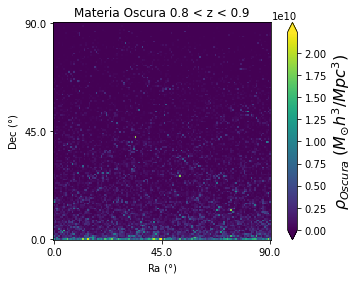

In [52]:
plt.figure()
fig_imshow = plt.imshow(Densidad_0_8_0_9_2D_oscura)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra[0],lado_ra[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec[0],lado_dec[n],3))
plt.title('Materia Oscura 0.8 < z < 0.9')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{Oscura} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.show()

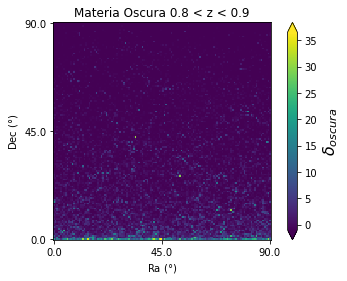

In [53]:
plt.figure()
fig_imshow = plt.imshow(Sobredensidad_0_8_0_9_2D_oscura)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra[0],lado_ra[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec[0],lado_dec[n],3))
plt.title('Materia Oscura 0.8 < z < 0.9')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{oscura}$',fontsize=16)
plt.show()

In [54]:
lado_ra_sample = np.linspace(35,40,n+1)  #129 fronteras para que haya 128 celdas
lado_dec_sample = np.linspace(35,40,n+1)


delta_ra_sample = lado_ra_sample[1] - lado_ra_sample[0]
delta_dec_sample = lado_dec_sample[1] - lado_dec_sample[0]

Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.9,transverse=False)**3-cosmo.comovingDistance(0,0.8,transverse=False)**3)
V_corteza = (4/3)*np.pi*(cosmo.comovingDistance(0,0.9,transverse=False)**3-cosmo.comovingDistance(0,0.8,transverse=False)**3)

Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*V_corteza

Vcelda_esferica_sample_2 = (delta_ra_sample*delta_dec_sample/(4*np.pi*(180/np.pi)**2))*V_corteza

Vcelda_esferica_sample_3 = (5**2/(4*np.pi*(180/np.pi)**2))*V_corteza/n**2



In [55]:
dec_gal_sample = dec_gal_0_8_0_9[np.where((ra_gal_0_8_0_9>35)&(ra_gal_0_8_0_9<40)&(dec_gal_0_8_0_9>35)&(dec_gal_0_8_0_9<40))[0]]
ra_gal_sample = ra_gal_0_8_0_9[np.where((ra_gal_0_8_0_9>35)&(ra_gal_0_8_0_9<40)&(dec_gal_0_8_0_9>35)&(dec_gal_0_8_0_9<40))[0]]
M_sample = M_0_8_0_9_cosmohub[np.where((ra_gal_0_8_0_9>35)&(ra_gal_0_8_0_9<40)&(dec_gal_0_8_0_9>35)&(dec_gal_0_8_0_9<40))[0]]
z_cosmohub_sample = z_0_8_0_9_cosmohub[np.where((ra_gal_0_8_0_9>35)&(ra_gal_0_8_0_9<40)&(dec_gal_0_8_0_9>35)&(dec_gal_0_8_0_9<40))[0]]
v_vir_sample = v_vir_cosmohub_0_8_0_9[np.where((ra_gal_0_8_0_9>35)&(ra_gal_0_8_0_9<40)&(dec_gal_0_8_0_9>35)&(dec_gal_0_8_0_9<40))[0]]

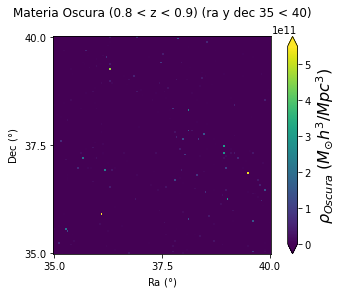

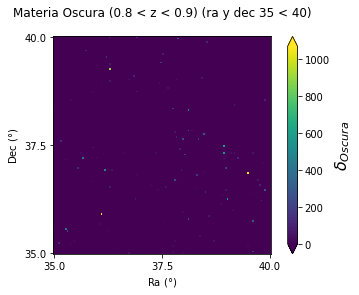

In [56]:
#Esta vez se van a ir guardando según sus coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda).



Densidad_sample_2D_oscura = np.zeros((n,n))

angulos_dec = []
angulos_ra = []

for dec,ra,m in zip(dec_gal_sample,ra_gal_sample,M_sample):
    ang_dec = bisect_left(lado_dec_sample, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra_sample, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
    Densidad_sample_2D_oscura[ang_dec,ang_ra] = Densidad_sample_2D_oscura[ang_dec,ang_ra] + (m/Vcelda_esferica_sample_2)
Densidad_media_sample_2D_oscura = np.mean(Densidad_sample_2D_oscura)
Sobredensidad_media_sample_2D_oscura = Densidad_sample_2D_oscura/Densidad_media_sample_2D_oscura - 1
#Primer indice controla la fila
#y el segundo la columna de esa matriz.


#plt.figure()
fig_imshow = plt.imshow(Densidad_sample_2D_oscura)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
ax.set_title('Materia Oscura (0.8 < z < 0.9) (ra y dec 35 < 40)', pad=20)
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{Oscura} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.savefig('../Plots/Dens_oscura_0_8_0_9_sample_disp_pocos_datos_jupyter.png')
plt.show()
    
#plt.figure()
fig_imshow = plt.imshow(Sobredensidad_media_sample_2D_oscura)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
ax.set_title('Materia Oscura (0.8 < z < 0.9) (ra y dec 35 < 40)', pad=20)
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{Oscura}$',fontsize=16)
plt.savefig('../Plots/Sobredens_oscura_0_8_0_9_sample_disp_pocos_datos_jupyter.png')
plt.show()

In [57]:
A12 = 2.876e-15 ##Hz
h_planck =6.62607004e-34 #m2 kg / s
nu21 = 1420e6 #Hz
m_h = 1.673723e-27 #kg
kboltz = 1.38064852e-23 #m2 kg s-2 K-1
c_light_meter = 3.0e8 #ms-1

In [58]:
print(Vcelda_esferica_sample,Vcelda_esferica_sample_2,Vcelda_esferica_sample_3,'(Mpc/h)^3')

0.13743285715017117 403.16533692061137 403.16533692061137 (Mpc/h)^3


In [59]:
#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

Densidad_3D_HI = np.zeros((n,n,n))
T_3D = np.zeros((n,n,n))

posiciones_x = []
posiciones_y = []
posiciones_z = []

for x,y,z,m,Z in zip(coords_x,coords_y,coords_z,M_HI(M_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,mass_so.deltaVir(z_cosmohub),v_vir_cosmohub),z_cosmohub,sigma):
    pos_x = bisect_left(Cubo_x, x)  #np.digitize
    pos_x = pos_x - 1
    if pos_x == -1:
        pos_x = 0
    pos_y = bisect_left(Cubo_y, y)
    pos_y = pos_y - 1
    if pos_y == -1:
        pos_y = 0
    pos_z = bisect_left(Cubo_z, z)
    pos_z = pos_z - 1
    if pos_z == -1:
        pos_z = 0
    posiciones_x.append(pos_x)
    posiciones_y.append(pos_y)
    posiciones_z.append(pos_z)
    Densidad_3D_HI[pos_x,pos_y,pos_z] = Densidad_3D_HI[pos_x,pos_y,pos_z] + (m/Vcelda)
    a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
    b = (((1+Z)**2)*1.989e30)
    c = (m/Vcelda)/(((3.086e22)**3/h**3)*cosmo.Hz(Z)*1e3/3.086e22)
    T_3D[pos_x,pos_y,pos_z] = T_3D[pos_x,pos_y,pos_z] + a*b*c

Densidad_3D_HI_media = np.mean(Densidad_3D_HI[posiciones_x,posiciones_y,posiciones_z])
Sobredensidad_3D_HI = Densidad_3D_HI/Densidad_3D_HI_media - 1
#Primer indice controla la matriz en la que está, el segundo la fila
#y el tercero la columna de esa matriz.

TypeError: M_HI() missing 1 required positional argument: 'sigma'

In [ ]:
plt.figure()
fig_imshow = plt.imshow(Densidad_3D_HI[:,:,50])
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel(r'Lado x ${(Mpc/h)}^3$')
plt.ylabel(r'Lado y ${(Mpc/h)}^3$')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_x[0],Cubo_x[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_y[0],Cubo_y[n],3))
plt.title('HI')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.savefig('../Plots/Dens_HI_3D_disp_pocos_datos.png')
plt.show()

In [ ]:
plt.figure()
fig_imshow = plt.imshow(Sobredensidad_3D_HI[:,:,50])
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel(r'Lado x ${(Mpc/h)}^3$')
plt.ylabel(r'Lado y ${(Mpc/h)}^3$')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_x[0],Cubo_x[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_y[0],Cubo_y[n],3))
plt.title('HI')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{HI}$',fontsize=16)
plt.savefig('../Plots/Sobredens_HI_3D_disp_pocos_datos.png')
plt.show()

Como es que la sobredensidad da igual que la densidad?

In [ ]:
plt.figure()
fig_imshow = plt.imshow(Densidad_3D_HI[30:70,30:70,50])
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'y (Mpc/h)')
plt.xticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_x[30],Cubo_x[70],3),2))
plt.yticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_y[30],Cubo_y[70],3),2))
plt.title('HI')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.show()

In [ ]:
plt.figure()
fig_imshow = plt.imshow(Sobredensidad_3D_HI[30:70,30:70,50])
plt.gca().invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'y (Mpc/h)')
plt.xticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_x[30],Cubo_x[70],3),2))
plt.yticks(ticks=np.linspace(0,39,3),labels=np.round(np.linspace(Cubo_y[30],Cubo_y[70],3),2))
plt.title('HI')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{HI}$',fontsize=16)
plt.show()

In [ ]:
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.scatter(posiciones_x,posiciones_y,posiciones_z,s=0.001,c=M_HI(M_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,mass_so.deltaVir(z_cosmohub),v_vir_cosmohub)/Vcelda)
#ax.set_xlabel('Lado x')
#ax.set_ylabel('Lado y')
#ax.set_zlabel('Lado z')
#ax.set_title('HI')
#plt.show()

In [ ]:
plt.figure()
fig_imshow = plt.imshow(T_3D[:,:,50])
plt.gca().invert_yaxis()
plt.xlabel(r'x (Mpc/h)')
plt.ylabel(r'x (Mpc/h)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_x[0],Cubo_x[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(Cubo_y[0],Cubo_y[n],3))
plt.title('Temperatura HI')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label('T(K)',fontsize=16)
plt.savefig('../Plots/T_HI_3D_disp_pocos_datos.png')
plt.show()

In [ ]:
#Ahora igual pero con las coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

Densidad_0_8_0_9_2D_HI = np.zeros((n,n))
T_0_8_0_9_2D = np.zeros((n,n))
angulos_dec = []
angulos_ra = []

for ra,dec,m,Z in zip(ra_gal_0_8_0_9,dec_gal_0_8_0_9,M_HI(M_0_8_0_9_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,mass_so.deltaVir(z_0_8_0_9_cosmohub),v_vir_cosmohub_0_8_0_9),z_0_8_0_9_cosmohub,sigma):
    ang_dec = bisect_left(lado_dec, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
    
    Densidad_0_8_0_9_2D_HI[ang_dec,ang_ra] = Densidad_0_8_0_9_2D_HI[ang_dec,ang_ra] + (m/Vcelda_esferica[ang_dec])
    a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
    b = ((1+Z)**2)/(cosmo.Hz(Z)*1e3/3.086e22)
    c = (m/Vcelda_esferica[ang_dec])*1.989e30/((3.086e22)**3/h**3)
    T_0_8_0_9_2D[ang_dec,ang_ra] = T_0_8_0_9_2D[ang_dec,ang_ra] + a*b*c
Densidad_0_8_0_9_2D_HI_media = np.mean(Densidad_0_8_0_9_2D_HI)
Sobredensidad_0_8_0_9_2D_HI = Densidad_0_8_0_9_2D_HI/Densidad_0_8_0_9_2D_HI_media - 1
#Primer indice controla la fila y el segundo la columna de la matriz.

In [ ]:
plt.figure()
fig_imshow = plt.imshow(Densidad_0_8_0_9_2D_HI)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra[0],lado_ra[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec[0],lado_dec[n],3))
plt.title('HI 0.8 < z < 0.9')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.show()

In [ ]:
plt.figure()
fig_imshow = plt.imshow(Sobredensidad_0_8_0_9_2D_HI)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra[0],lado_ra[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec[0],lado_dec[n],3))
plt.title('HI 0.8 < z < 0.9')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{HI}$',fontsize=16)
plt.show()

In [ ]:
plt.figure()
fig_imshow = plt.imshow(T_0_8_0_9_2D)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra[0],lado_ra[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec[0],lado_dec[n],3))
plt.title('T(K) 0.8 < z < 0.9')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$T(K)$',fontsize=16)
plt.show()

In [ ]:
#Ahora igual pero con las coordenadas angulares entre 35 y 40.

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

Densidad_sample_0_8_0_9_2D_HI = np.zeros((n,n)) 
b  = np.zeros((n,n))
for ra,dec,m,Z in zip(ra_gal_sample,dec_gal_sample,M_HI(M_sample,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_cosmohub_sample,mass_so.deltaVir(z_cosmohub_sample),v_vir_sample),z_cosmohub_sample,sigma):
    ang_dec = bisect_left(lado_dec_sample, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra_sample, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
        
    Densidad_sample_0_8_0_9_2D_HI[ang_dec,ang_ra] = Densidad_sample_0_8_0_9_2D_HI[ang_dec,ang_ra] + (m/Vcelda_esferica_sample_2)
    b[ang_dec,ang_ra] = b[ang_dec,ang_ra] + (((1+Z)**2)*1.989e30)*(m/Vcelda_esferica_sample_2)/(((3.086e22)**3/h**3)*cosmo.Hz(Z)*1e3/3.086e22) 
a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
T_sample_0_8_0_9_2D = a*b
Densidad_media_sample_0_8_0_9_HI = np.mean(Densidad_sample_0_8_0_9_2D_HI)
Sobredensidad_media_sample_0_8_0_9_HI = Densidad_sample_0_8_0_9_2D_HI/Densidad_media_sample_0_8_0_9_HI - 1
        
    
    
#Primer indice controla la fila y el segundo la columna de la matriz.


plt.figure()
fig_imshow = plt.imshow(Densidad_sample_0_8_0_9_2D_HI)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('HI 0.8 < z < 0.9 (35 < ra,dec < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.savefig('../Plots/Dens_HI_0_8_0_9_sample_disp_pocos_datos_jupyter.png')

plt.figure()
fig_imshow = plt.imshow(Sobredensidad_media_sample_0_8_0_9_HI)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('HI 0.8 < z < 0.9 (35 < ra,dec < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{HI}$',fontsize=16)
plt.savefig('../Plots/Sobredens_HI_0_8_0_9_sample_disp_pocos_datos_jupyter.png')

plt.figure()
fig_imshow = plt.imshow(T_sample_0_8_0_9_2D)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('Temperatura HI 0.8 < z < 0.9 (35 < ra,dec < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label('T(K)',fontsize=16)
plt.savefig('../Plots/T_HI_0_8_0_9_sample_disp_pocos_datos_jupyter.png')


In [ ]:
theta_gal_0_8_0_9 = 90 - dec_gal_0_8_0_9
phi_gal_0_8_0_9 = ra_gal_0_8_0_9

lado_theta = (180/np.pi)*np.arccos(np.linspace(np.cos(0),np.cos(np.pi/2),101)) #Dejar esto así o hacerlo 
lado_phi = np.linspace(0,90,101)                                               #lineal?

lado_theta_izq = lado_theta[:-1]
lado_theta_der = lado_theta[1:]

delta_phi = lado_phi[1] - lado_phi[0]



nside = 256
Apixel = hp.nside2pixarea(nside, degrees=False)


Vcelda_esferica_pix = ((Apixel)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.9,transverse=False)**3-cosmo.comovingDistance(0,0.8,transverse=False)**3)

npix = hp.nside2npix(nside)

Vcelda_esferica_pix2 = (1/npix)*(4/3)*np.pi*(cosmo.comovingDistance(0,0.9,transverse=False)**3-cosmo.comovingDistance(0,0.8,transverse=False)**3)

print(max(theta_gal_0_8_0_9),min(theta_gal_0_8_0_9))
print(max(phi_gal_0_8_0_9),min(phi_gal_0_8_0_9))



In [ ]:
print(Vcelda_esferica_pix,'(Mpc/h)^3')

In [ ]:
npix = hp.nside2npix(nside)
npix

In [ ]:
ipix_zona_ocupada = []
for pix in range(npix):
    if (0 <= hp.pix2ang(nside,pix)[0] <= np.pi/2)&(0 <= hp.pix2ang(nside,pix)[1] <= np.pi/2):
        ipix_zona_ocupada.append(pix)

In [ ]:
#Ahora igual pero con las coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

halo_ipix = []
mass_oscura_map = np.zeros(npix)
dens_oscura_map = np.zeros(npix)
    
for theta,phi,m in zip(theta_gal_0_8_0_9,phi_gal_0_8_0_9,M_0_8_0_9_cosmohub):
        
    ipix = hp.ang2pix(nside,(np.pi/180)*theta,(np.pi/180)*phi)
    halo_ipix.append(ipix)
    mass_oscura_map[ipix] = mass_oscura_map[ipix]+m
    dens_oscura_map[ipix] = dens_oscura_map[ipix]+m/Vcelda_esferica_pix    
    
map_oscura = np.bincount(halo_ipix)
map_oscura = list(map_oscura)
map_oscura = map_oscura + [0]*(npix-len(map_oscura))
map_oscura = np.array(map_oscura)
    
dens_oscura_map = list(dens_oscura_map)
dens_oscura_map = np.array(dens_oscura_map)
    
dens_oscura_media = np.mean(dens_oscura_map[ipix_zona_ocupada])
sobredens_oscura_map = dens_oscura_map/dens_oscura_media - 1
    
mass_oscura_map = list(mass_oscura_map)
mass_oscura_map = np.array(mass_oscura_map)

hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_mass_oscura_0_8_0_9_disp_pocos_datos_jupyter.fits',map_oscura,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_map_oscura_0_8_0_9_disp_pocos_datos.fits',mass_oscura_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_oscura_0_8_0_9_disp_pocos_datos_jupyter.fits',dens_oscura_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_oscura_0_8_0_9_disp_pocos_datos_jupyter.fits',sobredens_oscura_map,nest=False,coord='C',overwrite=True)
  
hp.mollview(map_oscura,title='Nº halos de materia oscura (0.8 < z 0.9)')
plt.savefig('../Plots/Mollview_map_oscura_0_8_0_9_disp_pocos_datos.png')
plt.show()
    
hp.mollview(mass_oscura_map,title=r'Masa de materia oscura en $M_{\odot}$ (0.8 < z 0.9)')
plt.savefig('../Plots/Mollview_mass_oscura_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(dens_oscura_map,title='Densidad de materia oscura en $M_{\odot}h^3/{Mpc}^3$ (0.8 < z < 0.9)')
plt.savefig('../Plots/Mollview_dens_oscura_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(sobredens_oscura_map,title='Sobredensidad de materia oscura (0.8 < z 0.9)')
plt.savefig('../Plots/Mollview_sobredens_0_8_0_9_disp_oscura_pocos_datos_jupyter.png')
plt.show()
    
#Ahora igual pero con las coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

HI_ipix = []
dens_HI_map = np.zeros(npix)
mass_HI_map = np.zeros(npix)
T_HI_map = np.zeros(npix)

for theta,phi,m,Z in zip(theta_gal_0_8_0_9,phi_gal_0_8_0_9,M_HI(M_0_8_0_9_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_0_8_0_9_cosmohub,mass_so.deltaVir(z_0_8_0_9_cosmohub),v_vir_cosmohub_0_8_0_9),z_0_8_0_9_cosmohub,sigma):
    ipix = hp.ang2pix(nside,(np.pi/180)*theta,(np.pi/180)*phi)
    HI_ipix.append(ipix)
    dens_HI_map[ipix] = dens_HI_map[ipix]+m/Vcelda_esferica_pix
    mass_HI_map[ipix] = mass_HI_map[ipix]+m
    a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
    b = ((1+Z)**2)/(cosmo.Hz(Z)*1e3/3.086e22)
    c = (m/Vcelda_esferica_pix)*1.989e30/((3.086e22)**3/h**3)
    T_HI_map[ipix] = T_HI_map[ipix] + a*b*c


map_HI = np.bincount(HI_ipix)
map_HI = list(map_HI)
map_HI = map_HI + [0]*(npix-len(map_HI))
map_HI = np.array(map_HI)

dens_HI_map = list(dens_HI_map)
dens_HI_map = np.array(dens_HI_map)
    
dens_HI_media = np.mean(dens_HI_map[ipix_zona_ocupada])
sobredens_HI_map = dens_HI_map/dens_HI_media - 1
    
mass_HI_map = list(mass_HI_map)
mass_HI_map = np.array(mass_HI_map)

T_HI_map = list(T_HI_map)
T_HI_map = np.array(T_HI_map)

hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_mass_HI_0_8_0_9_disp_pocos_datos_jupyter.fits',map_HI,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_map_HI_0_8_0_9_disp_pocos_datos.fits',mass_HI_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_HI_0_8_0_9_disp_pocos_datos_jupyter.fits',dens_HI_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_HI_0_8_0_9_disp_pocos_datos_jupyter.fits',sobredens_HI_map,nest=False,coord='C',overwrite=True)
    
hp.mollview(map_HI,title='Nº de galaxias de HI (igual al nº de halos) (0.8 < z < 0.9)')
plt.savefig('../Plots/Mollview_map_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(mass_oscura_map,title=r'Masa de HI en $M_{\odot}$ (0.8 < z < 0.9)')
plt.savefig('../Plots/Mollview_mass_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(dens_HI_map,title=r'Densidad de HI en $M_{\odot}h^3/{Mpc}^3$ (0.8 < z < 0.9)')
plt.savefig('../Plots/Mollview_dens_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(sobredens_HI_map,title=r'Sobredensidad de HI (0.8 < z < 0.9)')
plt.savefig('../Plots/Mollview_sobredens_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(T_HI_map,title='T(K) de HI (0.8 < z < 0.9)')
plt.savefig('../Plots/Mollview_T_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
plt.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.density(ra_gal_0_8_0_9, dec_gal_0_8_0_9, nside=nside)
cb = map.colorbar(mappable, cb_label="n [arcmin$^{-2}$]")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_Dens_angular_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
Apixel_arcmin_cuadrados = hp.nside2pixarea(nside, degrees=True)*60**2
Dens_cuentas_arcmin_cuadrado = map_oscura/Apixel_arcmin_cuadrados
Dens_cuentas_arcmin_cuadrado_media = np.mean(Dens_cuentas_arcmin_cuadrado[ipix_zona_ocupada])
Sobredens_cuentas_arcmin_cuadrado = Dens_cuentas_arcmin_cuadrado/Dens_cuentas_arcmin_cuadrado_media - 1

crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(Sobredens_cuentas_arcmin_cuadrado,nest=False,color_percentiles=[10,99])
cb = map.colorbar(mappable, cb_label=r"n / $\overline{n}$ - 1")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_Sobredens_angular_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(dens_oscura_map,nest=False)
cb = map.colorbar(mappable, cb_label=r"$\rho_{oscura} \; (M_{\odot}h^3/{Mpc}^3)$")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_Dens_Oscura_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(sobredens_oscura_map,nest=False,color_percentiles=[10,99])
cb = map.colorbar(mappable, cb_label=r"$\delta_{oscura}$")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_Sobredens_Oscura_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(dens_HI_map,nest=False)
cb = map.colorbar(mappable, cb_label=r"$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_Dens_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(sobredens_HI_map,nest=False,color_percentiles=[10,99])
cb = map.colorbar(mappable, cb_label=r"$\delta_{HI}$")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_Sobredens_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
pocos_datoscrit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_8_0_9,dec_gal_0_8_0_9,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(T_HI_map,nest=False)
cb = map.colorbar(mappable, cb_label=r"$T_{HI}$ (K)")
map.focus(ra_gal_0_8_0_9,dec_gal_0_8_0_9)
map.title('0.8 < z < 0.9')
plt.savefig('../Plots/Skymapper_T_HI_0_8_0_9_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
T_0_8_0_9_mollview_media = np.mean(T_HI_map[ipix_zona_ocupada])
print('T(k) media (0.8 < z < 0.9) =',T_0_8_0_9_mollview_media)

In [ ]:
M_0_5_0_6_cosmohub = []
z_0_5_0_6_cosmohub = []
ra_gal_0_5_0_6 = []
dec_gal_0_5_0_6 = []
v_vir_cosmohub_0_5_0_6 = []

    
indexz = np.where((z_cosmohub>0.5)&(z_cosmohub<0.6))[0]
M_0_5_0_6_cosmohub = M_cosmohub[indexz]
z_0_5_0_6_cosmohub = z_cosmohub[indexz]
ra_gal_0_5_0_6 = ra_gal[indexz]
dec_gal_0_5_0_6 = dec_gal[indexz]
v_vir_cosmohub_0_5_0_6 = v_vir_cosmohub[indexz]

M_0_5_0_6_cosmohub = np.array(M_0_5_0_6_cosmohub)
z_0_5_0_6_cosmohub = np.array(z_0_5_0_6_cosmohub)
ra_gal_0_5_0_6 = np.array(ra_gal_0_5_0_6)
dec_gal_0_5_0_6 = np.array(dec_gal_0_5_0_6)
v_vir_cosmohub_0_5_0_6 = np.array(v_vir_cosmohub_0_5_0_6)

In [ ]:
def n(Masa, z):
    n = mass_function.massFunction(Masa, z, mdef = 'fof', model = 'crocce10', q_out = 'dndlnM')
    return n

In [ ]:
z = 0.55
Masa = np.logspace(11,15)
potencia = np.log10(Masa[1]/Masa[0])
dMasa = Masa*(10**potencia-1)
dMasa = np.array(dMasa)
A = sum(n(Masa, z)*dMasa)
A

In [ ]:
def n(Masa, z):
    n = (1/A)*mass_function.massFunction(Masa, z, mdef = 'fof', model = 'crocce10', q_out = 'dndlnM')
    return n

In [ ]:
pocos_datosmhist,edges_mass = np.histogram(M_0_5_0_6_cosmohub,bins=100000)
Mass_array = (edges_mass[:-1] + edges_mass[1:])/2
dMasa = edges_mass[1:] - edges_mass[:-1]
B = sum(mhist*dMasa)
mhist = mhist/B

plt.figure()
plt.plot(Mass_array,mhist,label='halos MICE 0.5 > z > 0.6')
plt.plot(Mass_array,n(Mass_array,0.5),label=r'n(M,z) ${(h/Mpc)}^3$ con z=0.5')
plt.plot(Mass_array,n(Mass_array,0.55),label=r'n(M,z) ${(h/Mpc)}^3$ con z=0.55')
plt.plot(Mass_array,n(Mass_array,0.6),label=r'n(M,z) ${(h/Mpc)}^3$ con z=0.6')
plt.xlabel(r'$\frac{M}{M_{\odot}}$',fontsize=25)
plt.ylabel('Cada uno con sus unidades')
plt.xscale('log')
plt.yscale('log')
plt.title('Usando histogram')
plt.legend()
plt.savefig('../Plots/Hist_halos_0_5_0_6_cada_uno_sus_unidades_disp_pocos_datos.png')
plt.show()

In [ ]:
print(max(ra_gal_0_5_0_6),min(ra_gal_0_5_0_6),'grados')
print(max(dec_gal_0_5_0_6),min(dec_gal_0_5_0_6),'grados')

In [ ]:
n = 128
#Esta vez se van a ir guardando según sus coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda).

Densidad_0_5_0_6_2D_oscura = np.zeros((n,n))
angulos_dec = []
angulos_ra = []

for dec,ra,m in zip(dec_gal_0_5_0_6,ra_gal_0_5_0_6,M_0_5_0_6_cosmohub):
    ang_dec = bisect_left(lado_dec, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
    Densidad_0_5_0_6_2D_oscura[ang_dec,ang_ra] = Densidad_0_5_0_6_2D_oscura[ang_dec,ang_ra] + (m/Vcelda_esferica[ang_dec])
Densidad_0_5_0_6_2D_oscura_media = np.mean(Densidad_0_5_0_6_2D_oscura)
Sobredensidad_0_5_0_6_2D_oscura = Densidad_0_5_0_6_2D_oscura/Densidad_0_5_0_6_2D_oscura_media - 1    
#Primer indice controla la fila
#y el segundo la columna de esa matriz.


#Ahora igual pero con las coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

Densidad_0_5_0_6_2D_HI = np.zeros((n,n))
T_0_5_0_6_2D = np.zeros((n,n))
angulos_dec = []
angulos_ra = []

for ra,dec,m,Z in zip(ra_gal_0_5_0_6,dec_gal_0_5_0_6,M_HI(M_0_5_0_6_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z,mass_so.deltaVir(z_0_5_0_6_cosmohub),v_vir_cosmohub_0_5_0_6),z_0_5_0_6_cosmohub,sigma):
    ang_dec = bisect_left(lado_dec, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
    
    Densidad_0_5_0_6_2D_HI[ang_dec,ang_ra] = Densidad_0_5_0_6_2D_HI[ang_dec,ang_ra] + (m/Vcelda_esferica[ang_dec])
    a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
    b = ((1+Z)**2)/(cosmo.Hz(Z)*1e3/3.086e22)
    c = (m/Vcelda_esferica[ang_dec])*1.989e30/((3.086e22)**3/h**3)
    T_0_5_0_6_2D[ang_dec,ang_ra] = T_0_5_0_6_2D[ang_dec,ang_ra] + a*b*c
Densidad_0_5_0_6_2D_HI_media = np.mean(Densidad_0_5_0_6_2D_HI)
Sobredensidad_0_5_0_6_2D_HI = Densidad_0_5_0_6_2D_HI/Densidad_0_5_0_6_2D_HI_media - 1
#Primer indice controla la fila y el segundo la columna de la matriz.0_5_0_6

In [ ]:
 

densidad_critica = cosmo.rho_c(0.55)*1e9/h
print('Densidad crítica(z=0.55)',densidad_critica,'(7.85 10^11) Msol h^3 /Mpc^3', flush=True)
   
print(max(dec_gal_0_5_0_6),min(dec_gal_0_5_0_6),'grados', flush=True)
print(max(ra_gal_0_5_0_6),min(ra_gal_0_5_0_6),'grados', flush=True)
    
print(max(dec_gal),min(dec_gal),'grados', flush=True)
print(max(ra_gal),min(ra_gal),'grados', flush=True)

lado_ra = np.linspace(0,90,129)  #129 fronteras para que haya 128 celdas
lado_dec = (180/np.pi)*np.arccos(np.linspace(np.cos(0),np.cos(np.pi/2),129))
lado_dec_lin = np.linspace(0,90,129)
lado_dec_izq = lado_dec[:-1]
lado_dec_der = lado_dec[1:]
lado_dec_lin_izq = lado_dec_lin[:-1]
lado_dec_lin_der = lado_dec_lin[1:]


delta_ra = lado_ra[1] - lado_ra[0]
delta_dec = lado_dec[1] - lado_dec[0]

Vcelda_esferica = (((np.cos(lado_dec_izq*2*np.pi/360)-np.cos(lado_dec_der*2*np.pi/360))*delta_ra*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)
Vcelda_esferica_lin = (((np.cos(lado_dec_lin_izq*2*np.pi/360)-np.cos(lado_dec_lin_der*2*np.pi/360))*delta_ra*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)


#Esta vez se van a ir guardando según sus coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda).

    
lado_ra_sample = np.linspace(35,40,n+1)  #129 fronteras para que haya 128 celdas
lado_dec_sample = np.linspace(35,40,n+1)


delta_ra_sample = lado_ra_sample[1] - lado_ra_sample[0]
delta_dec_sample = lado_dec_sample[1] - lado_dec_sample[0]

Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)
V_corteza = (4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*V_corteza

Vcelda_esferica_sample_2 = (delta_ra_sample*delta_dec_sample/(4*np.pi*(180/np.pi)**2))*V_corteza

Vcelda_esferica_sample_3 = (5**2/(4*np.pi*(180/np.pi)**2))*V_corteza/n**2 


#Esta vez se van a ir guardando según sus coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda).

dec_gal_sample = dec_gal_0_5_0_6[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
ra_gal_sample = ra_gal_0_5_0_6[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
M_sample = M_0_5_0_6_cosmohub[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
z_cosmohub_sample = z_0_5_0_6_cosmohub[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
v_vir_sample = v_vir_cosmohub_0_5_0_6[np.where((ra_gal_0_5_0_6>35)&(ra_gal_0_5_0_6<40)&(dec_gal_0_5_0_6>35)&(dec_gal_0_5_0_6<40))[0]]
    

Densidad_sample_2D_oscura = np.zeros((n,n))

angulos_dec = []
angulos_ra = []

for dec,ra,m in zip(dec_gal_sample,ra_gal_sample,M_sample):
    ang_dec = bisect_left(lado_dec_sample, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra_sample, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
    Densidad_sample_2D_oscura[ang_dec,ang_ra] = Densidad_sample_2D_oscura[ang_dec,ang_ra] + (m/Vcelda_esferica_sample_2)
Densidad_media_sample_2D_oscura = np.mean(Densidad_sample_2D_oscura)
Sobredensidad_media_sample_2D_oscura = Densidad_sample_2D_oscura/Densidad_media_sample_2D_oscura - 1
#Primer indice controla la fila
#y el segundo la columna de esa matriz.


#plt.figure()
fig_imshow = plt.imshow(Densidad_sample_2D_oscura)
ax = plt.gca() 
ax.invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
ax.set_title('Materia Oscura (0.5 < z < 0.6) (35 < ra,dec < 40)',pad=20)
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{Oscura} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.savefig('../Plots/Dens_oscura_0_5_0_6_sample_disp_pocos_datos_jupyter.png')
plt.show()
    
#plt.figure()
fig_imshow = plt.imshow(Sobredensidad_media_sample_2D_oscura)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('Materia Oscura (0.5 < z < 0.6) (ra y dec 35 < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{Oscura}$',fontsize=16)
plt.savefig('../Plots/Sobredens_oscura_0_5_0_6_sample_disp_pocos_datos_jupyter.png')
plt.show()
    
    


A12 = 2.876e-15 ##Hz
h_planck =6.62607004e-34 #m2 kg / s
nu21 = 1420e6 #Hz
m_h = 1.673723e-27 #kg
kboltz = 1.38064852e-23 #m2 kg s-2 K-1
c_light_meter = 3.0e8 #ms-1	

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)
    
lado_ra_sample = np.linspace(35,40,n+1)  #100 fronteras para que haya 99 celdas
lado_dec_sample = np.linspace(35,40,n+1)

delta_ra_sample = lado_ra_sample[1] - lado_ra_sample[0]
delta_dec_sample = lado_dec_sample[1] - lado_dec_sample[0]

V_corteza = (4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

Vcelda_esferica_sample = (((1-np.cos(delta_dec_sample*2*np.pi/360))*delta_ra_sample*2*np.pi/360)/(4*np.pi))*V_corteza

Vcelda_esferica_sample_2 = (delta_ra_sample*delta_dec_sample/(4*np.pi*(180/np.pi)**2))*V_corteza

Vcelda_esferica_sample_3 = (5**2/(4*np.pi*(180/np.pi)**2))*V_corteza/n**2 

Densidad_sample_0_5_0_6_2D_HI = np.zeros((n,n)) 
b  = np.zeros((n,n))
for ra,dec,m,Z in zip(ra_gal_sample,dec_gal_sample,M_HI(M_sample,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_cosmohub_sample,mass_so.deltaVir(z_cosmohub_sample),v_vir_sample),z_cosmohub_sample,sigma):
    ang_dec = bisect_left(lado_dec_sample, dec)  #np.digitize
    ang_dec = ang_dec - 1
    if ang_dec == -1:
        ang_dec = 0
    ang_ra = bisect_left(lado_ra_sample, ra)
    ang_ra = ang_ra - 1
    if ang_ra == -1:
        ang_ra = 0
    angulos_dec.append(ang_dec)
    angulos_ra.append(ang_ra)
        
    Densidad_sample_0_5_0_6_2D_HI[ang_dec,ang_ra] = Densidad_sample_0_5_0_6_2D_HI[ang_dec,ang_ra] + (m/Vcelda_esferica_sample_2)
    b[ang_dec,ang_ra] = b[ang_dec,ang_ra] + (((1+Z)**2)*1.989e30)*(m/Vcelda_esferica_sample_2)/(((3.086e22)**3/h**3)*cosmo.Hz(Z)*1e3/3.086e22) 
a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
T_sample_0_5_0_6_2D = a*b
Densidad_media_sample_0_5_0_6_HI = np.mean(Densidad_sample_0_5_0_6_2D_HI)
Sobredensidad_media_sample_0_5_0_6_HI = Densidad_sample_0_5_0_6_2D_HI/Densidad_media_sample_0_5_0_6_HI - 1
        
    
    
#Primer indice controla la fila y el segundo la columna de la matriz.


plt.figure()
fig_imshow = plt.imshow(Densidad_sample_0_5_0_6_2D_HI)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('HI 0.5 < z < 0.6 (35 < ra,dec < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$',fontsize=16)
plt.savefig('../Plots/Dens_HI_0_5_0_6_sample_disp_pocos_datos_jupyter.png')

plt.figure()
fig_imshow = plt.imshow(Sobredensidad_media_sample_0_5_0_6_HI)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('HI 0.5 < z < 0.6 (35 < ra,dec < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label(r'$\delta_{HI}$',fontsize=16)
plt.savefig('../Plots/Sobredens_HI_0_5_0_6_sample_disp_pocos_datos_jupyter.png')

plt.figure()
fig_imshow = plt.imshow(T_sample_0_5_0_6_2D)
plt.gca().invert_yaxis()
plt.xlabel(r'Ra ($\degree$)')
plt.ylabel(r'Dec ($\degree$)')
plt.xticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_ra_sample[0],lado_ra_sample[n],3))
plt.yticks(ticks=np.linspace(0,n-1,3),labels=np.linspace(lado_dec_sample[0],lado_dec_sample[n],3))
plt.title('Temperatura HI 0.5 < z < 0.6 (35 < ra,dec < 40)')
cbar = plt.colorbar(fig_imshow, extend='both')
cbar.set_label('T(K)',fontsize=16)
plt.savefig('../Plots/T_HI_0_5_0_6_sample_disp_pocos_datos_jupyter.png')

	
theta_gal_0_5_0_6 = 90 - dec_gal_0_5_0_6
phi_gal_0_5_0_6 = ra_gal_0_5_0_6

lado_theta = (180/np.pi)*np.arccos(np.linspace(np.cos(0),np.cos(np.pi/2),101)) #Dejar esto así o hacerlo 
lado_phi = np.linspace(0,90,101)                                               #lineal?

lado_theta_izq = lado_theta[:-1]
lado_theta_der = lado_theta[1:]

delta_phi = lado_phi[1] - lado_phi[0]

nside = 256
Apixel = hp.nside2pixarea(nside, degrees=False)


Vcelda_esferica_pix = ((Apixel)/(4*np.pi))*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

npix = hp.nside2npix(nside)

Vcelda_esferica_pix2 = (1/npix)*(4/3)*np.pi*(cosmo.comovingDistance(0,0.6,transverse=False)**3-cosmo.comovingDistance(0,0.5,transverse=False)**3)

print(max(theta_gal_0_5_0_6),min(theta_gal_0_5_0_6), flush=True)
print(max(phi_gal_0_5_0_6),min(phi_gal_0_5_0_6))


#Esta vez se van a ir guardando según sus coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda).

halo_ipix = []
mass_oscura_map = np.zeros(npix)
dens_oscura_map = np.zeros(npix)
    
for theta,phi,m in zip(theta_gal_0_5_0_6,phi_gal_0_5_0_6,M_0_5_0_6_cosmohub):
        
    ipix = hp.ang2pix(nside,(np.pi/180)*theta,(np.pi/180)*phi)
    halo_ipix.append(ipix)
    mass_oscura_map[ipix] = mass_oscura_map[ipix]+m
    dens_oscura_map[ipix] = dens_oscura_map[ipix]+m/Vcelda_esferica_pix    
    
map_oscura = np.bincount(halo_ipix)
map_oscura = list(map_oscura)
map_oscura = map_oscura + [0]*(npix-len(map_oscura))
map_oscura = np.array(map_oscura)
    
dens_oscura_map = list(dens_oscura_map)
dens_oscura_map = np.array(dens_oscura_map)
    
dens_oscura_media = np.mean(dens_oscura_map[ipix_zona_ocupada])
sobredens_oscura_map = dens_oscura_map/dens_oscura_media - 1
    
mass_oscura_map = list(mass_oscura_map)
mass_oscura_map = np.array(mass_oscura_map)

hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_mass_oscura_0_5_0_6_disp_pocos_datos_jupyter.fits',map_oscura,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_map_oscura_0_5_0_6_disp_pocos_datos.fits',mass_oscura_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_oscura_0_5_0_6_disp_pocos_datos_jupyter.fits',dens_oscura_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_oscura_0_5_0_6_disp_pocos_datos_jupyter.fits',sobredens_oscura_map,nest=False,coord='C',overwrite=True)    
  
hp.mollview(map_oscura,title='Nº halos de materia oscura (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_map_oscura_0_5_0_6_disp_pocos_datos.png')
plt.show()
    
hp.mollview(mass_oscura_map,title=r'Masa de materia oscura en $M_{\odot}$ (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_mass_oscura_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(dens_oscura_map,title='Densidad de materia oscura en $M_{\odot}h^3/{Mpc}^3$ (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_dens_oscura_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(sobredens_oscura_map,title='Sobredensidad de materia oscura (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_sobredens_0_5_0_6_disp_oscura_pocos_datos_jupyter.png')
plt.show()
    
#Ahora igual pero con las coordenadas angulares

#Se clasifican en celdas de manera que el límite superior de la celda cuenta 
#como la celda anterior (excepto el primer límite de la primera celda,
#que cuenta como la primera celda)

HI_ipix = []
dens_HI_map = np.zeros(npix)
mass_HI_map = np.zeros(npix)
T_HI_map = np.zeros(npix)

for theta,phi,m,Z in zip(theta_gal_0_5_0_6,phi_gal_0_5_0_6,M_HI(M_0_5_0_6_cosmohub,alpha,beta,v_c0,v_c1,Omega_m,Omega_b,h,z_0_5_0_6_cosmohub,mass_so.deltaVir(z_0_5_0_6_cosmohub),v_vir_cosmohub_0_5_0_6),z_0_5_0_6_cosmohub,sigma):
    ipix = hp.ang2pix(nside,(np.pi/180)*theta,(np.pi/180)*phi)
    HI_ipix.append(ipix)
    dens_HI_map[ipix] = dens_HI_map[ipix]+m/Vcelda_esferica_pix
    mass_HI_map[ipix] = mass_HI_map[ipix]+m
    a = (3*h_planck*c_light_meter**3*A12)/(32*np.pi*kboltz*m_h*nu21**2)
    b = ((1+Z)**2)/(cosmo.Hz(Z)*1e3/3.086e22)
    c = (m/Vcelda_esferica_pix)*1.989e30/((3.086e22)**3/h**3)
    T_HI_map[ipix] = T_HI_map[ipix] + a*b*c
    #T_0_5_0_6_mollview_media = T_0_5_0_6_mollview_media + a*b*c


map_HI = np.bincount(HI_ipix)
map_HI = list(map_HI)
map_HI = map_HI + [0]*(npix-len(map_HI))
map_HI = np.array(map_HI)

dens_HI_map = list(dens_HI_map)
dens_HI_map = np.array(dens_HI_map)
    
dens_HI_media = np.mean(dens_HI_map[ipix_zona_ocupada])
sobredens_HI_map = dens_HI_map/dens_HI_media - 1
    
mass_HI_map = list(mass_HI_map)
mass_HI_map = np.array(mass_HI_map)

T_HI_map = list(T_HI_map)
T_HI_map = np.array(T_HI_map)


hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_mass_HI_0_5_0_6_disp_pocos_datos_jupyter.fits',map_HI,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_map_HI_0_5_0_6_disp_pocos_datos.fits',mass_HI_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_HI_0_5_0_6_disp_pocos_datos_jupyter.fits',dens_HI_map,nest=False,coord='C',overwrite=True)
hp.fitsfunc.write_map('/scratch/davfer/Cosmohub/Mollview_dens_HI_0_5_0_6_disp_pocos_datos_jupyter.fits',sobredens_HI_map,nest=False,coord='C',overwrite=True)
    
hp.mollview(map_HI,title='Nº de galaxias de HI (igual al nº de halos) (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_map_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(mass_oscura_map,title=r'Masa de HI en $M_{\odot}$ (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_mass_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(dens_HI_map,title=r'Densidad de HI en $M_{\odot}h^3/{Mpc}^3$ (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_dens_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(sobredens_HI_map,title=r'Sobredensidad de HI (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_sobredens_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()
    
hp.mollview(T_HI_map,title='T(K) de HI (0.5 < z 0.6)')
plt.savefig('../Plots/Mollview_T_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
plt.show()

In [ ]:
T_0_5_0_6_mollview_media = np.mean(T_HI_map[ipix_zona_ocupada])
print('T(K) media (0.5 < z < 0.6) =',T_0_5_0_6_mollview_media)

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.density(ra_gal_0_5_0_6, dec_gal_0_5_0_6, nside=nside)
cb = map.colorbar(mappable, cb_label="n [arcmin$^{-2}$]")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_Dens_angular_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
Apixel_arcmin_cuadrados = hp.nside2pixarea(nside, degrees=True)*60**2
Dens_cuentas_arcmin_cuadrado = map_oscura/Apixel_arcmin_cuadrados
Dens_cuentas_arcmin_cuadrado_media = np.mean(Dens_cuentas_arcmin_cuadrado[ipix_zona_ocupada])
Sobredens_cuentas_arcmin_cuadrado = Dens_cuentas_arcmin_cuadrado/Dens_cuentas_arcmin_cuadrado_media - 1
      
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(Sobredens_cuentas_arcmin_cuadrado,nest=False,color_percentiles=[10,99])
cb = map.colorbar(mappable, cb_label=r"n / $\overline{n}$ - 1")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_Sobredens_angular_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(dens_oscura_map,nest=False)
cb = map.colorbar(mappable, cb_label=r"$\rho_{oscura} \; (M_{\odot}h^3/{Mpc}^3)$")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_Dens_Oscura_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(sobredens_oscura_map,nest=False,color_percentiles=[10,99])
cb = map.colorbar(mappable, cb_label=r"$\delta_{oscura}$")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_Sobredens_Oscura_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(dens_HI_map,nest=False)
cb = map.colorbar(mappable, cb_label=r"$\rho_{HI} \; (M_{\odot}h^3/{Mpc}^3)$")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_Dens_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(sobredens_HI_map,nest=False,color_percentiles=[10,99])
cb = map.colorbar(mappable, cb_label=r"$\delta_{HI}$")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_Sobredens_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()

In [ ]:
crit = skm.stdDistortion
proj = skm.Mollweide.optimize(ra_gal_0_5_0_6,dec_gal_0_5_0_6,crit=crit)
map = skm.Map(proj)
sep = 30
map.grid(sep=sep)
mappable = map.healpix(T_HI_map,nest=False)
cb = map.colorbar(mappable, cb_label=r"$T_{HI}$ (K)")
map.focus(ra_gal_0_5_0_6,dec_gal_0_5_0_6)
map.title('0.5 < z < 0.6')
plt.savefig('../Plots/Skymapper_T_HI_0_5_0_6_disp_pocos_datos_jupyter.png')
map.show()